In [1]:
from functions_paper import *

# READ DATA AND PARAMETER VALUES

In [40]:
#READ DATA
avgdata, stddata=read_data()

#SUFFIX FOR SIMULATIONS
suffix='minerr_19'

#PARAMETERS
Temp=[22,28]
Daylength=[0,8,12,16,24]
Daylength2=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4]+list(range(4,25,2))
params=[]
with open('results/parameters_'+suffix+'.txt', 'r') as f:
    for line in f:
        w=line.split()
        params.append(float(w[0]))    

# FIGURE 1
### SIMULATIONS

In [41]:
mutants=['Col', 'pif4', 'pifq', 'PIF4ox',
         'phyB-9', 'PHYBox', 'elf3-8', 'ELF3ox',
         'COP1-OE', 'cop1-4', 'ELF3ox_cop1-4', 'elf3-8_cop1-4',
         'hy5', 'elf3-8 phyB-9', 'phyB-9 cop1-4']
hypo_python, tot_python=model_results(Temp,Daylength2,params,mutants)

### WRITE DATA FROM SIMULATIONS

In [42]:
with pd.ExcelWriter('results/fig1_data.xls') as writer:
    for mut in mutants:
        W=[]
        for (D,T) in itertools.product(Daylength2,Temp):
            key=str(T)+'_'+str(D)
            try:
                W.append([D,T,avgdata[mut][key],stddata[mut][key],hypo_python[mut][key]])
            except:
                W.append([D,T,'NaN','NaN',hypo_python[mut][key]])
        DFdata=pd.DataFrame.from_records(W, columns=['Daylength', 'Temperature', 'Average Growth (experimental)', 'Standard Deviation Growth (experimental)', 'Model prediction'])
        DFdata.to_excel(writer, sheet_name=mut, float_format='%.3f',index=False)

### PLOT SIMULATIONS

/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator


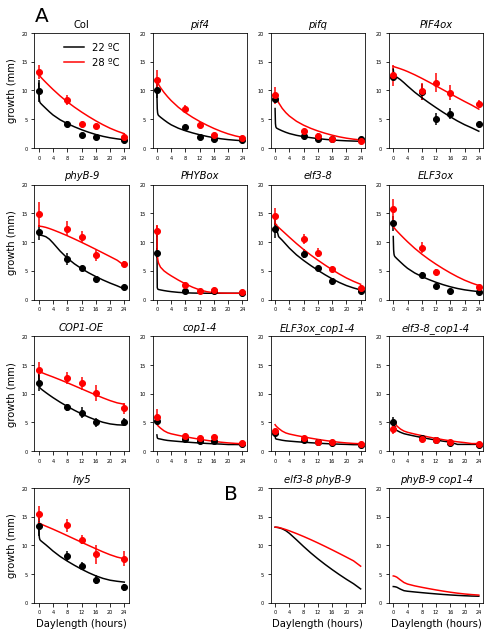

In [43]:
fig=plt.figure(figsize=(7,9))
ncols=4
nrows=4
ncols=4
nrows=4
count=1
for mut in mutants:
    if count==14:
        count+=1
    ax=fig.add_subplot(nrows,ncols,count)
    #PLOT SIMULATIONS
    hp22=[]
    hp28=[]
    for D in Daylength2:
        key22='22_'+str(D)
        key28='28_'+str(D)
        hp22.append(hypo_python[mut][key22])
        hp28.append(hypo_python[mut][key28])  
    ax.plot(Daylength2, hp22, 'k', label='22 ºC')
    ax.plot(Daylength2, hp28, 'r', label='28 ºC')
    #DATA
    d22=[]
    d28=[]
    s22=[]
    s28=[]
    for D in Daylength:
        key22='22_'+str(D)
        key28='28_'+str(D)
        if mut in avgdata:
            d22.append(avgdata[mut][key22])
            d28.append(avgdata[mut][key28])
            s22.append(stddata[mut][key22])
            s28.append(stddata[mut][key28])
    if mut in avgdata:
        ax.errorbar(Daylength, d22, yerr=s22, fmt='o', color='k')
        ax.errorbar(Daylength, d28, yerr=s28, fmt='o', color='r')
    if mut=='Col':
        ax.set_title(mut, size=10)
    else:
        ax.set_title(mut, style='italic', size=10)
    ax.set_ylim([0,20])
    if count==1:
        ax.legend(loc='upper right', frameon=False)
        ax.text(0,1.1,'A',fontsize=20,transform=ax.transAxes)
    if count>12:
        ax.set_xlabel('Daylength (hours)', size=10)
    if count%4==1:
        ax.set_ylabel('growth (mm)', size=10)
    if count==13:
        fig.tight_layout()
    if count==15:
        ax.text(-0.5,0.9,'B',fontsize=20,transform=ax.transAxes)
    ax.set_xticks([0,4,8,12,16,20,24])
    ax.set_xticklabels([0,4,8,12,16,20,24], size=5)
    ax.set_yticklabels(ax.get_yticks(), size=5)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    count+=1
#fig.tight_layout()
fig.savefig('figures/fig1_paper.pdf', bbox_inches='tight')

# FIGURE 3

KeyError: '22_4'

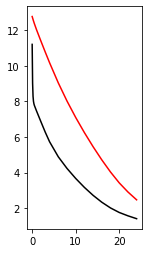

In [44]:
mutants=['Col', 'phyB-9', 'PHYBox',
         'COP1-OE', 'cop1-4', 'elf3-8']
fig=plt.figure(figsize=(7,9))
ncols=3
nrows=2
count=1
for mut in mutants:
    ax=fig.add_subplot(nrows,ncols,count)
    #PLOT SIMULATIONS
    hp22=[]
    hp28=[]
    for D in Daylength2:
        key22='22_'+str(D)
        key28='28_'+str(D)
        hp22.append(hypo_python[mut][key22])
        hp28.append(hypo_python[mut][key28])  
    ax.plot(Daylength2, hp22, 'k', label='22 ºC')
    ax.plot(Daylength2, hp28, 'r', label='28 ºC')
    #DATA
    d22=[]
    d28=[]
    s22=[]
    s28=[]
    for D in [4]:
        key22='22_'+str(D)
        key28='28_'+str(D)
        if mut in avgdata:
            d22.append(avgdata[mut][key22])
            d28.append(avgdata[mut][key28])
            s22.append(stddata[mut][key22])
            s28.append(stddata[mut][key28])
    if mut in avgdata:
        ax.errorbar(Daylength, d22, yerr=s22, fmt='o', color='k')
        ax.errorbar(Daylength, d28, yerr=s28, fmt='o', color='r')
    if mut=='Col':
        ax.set_title(mut, size=10)
    else:
        ax.set_title(mut, style='italic', size=10)
    ax.set_ylim([0,20])
    if count==1:
        ax.legend(loc='upper right', frameon=False)
    if count>3:
        ax.set_xlabel('Daylength (hours)', size=10)
    if count%3==1:
        ax.set_ylabel('growth (mm)', size=10)
    ax.set_xticks([0,4,8,12,16,20,24])
    ax.set_xticklabels([0,4,8,12,16,20,24], size=5)
    ax.set_yticklabels(ax.get_yticks(), size=5)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    count+=1
fig.tight_layout()
fig.savefig('figures/fig3_paper.pdf', bbox_inches='tight')

# FIGURE 4
### PROTEIN DYNAMICS IN SHORT DAY

In [45]:
time=np.linspace(0,120,500)
mut='Col'
B22=tot_python[mut]['22_8'][:,0]
B28=tot_python[mut]['28_8'][:,0]
E22=tot_python[mut]['22_8'][:,1]
E28=tot_python[mut]['28_8'][:,1]
P22=tot_python[mut]['22_8'][:,2]
P28=tot_python[mut]['28_8'][:,2]
C22=tot_python[mut]['22_8'][:,3]
C28=tot_python[mut]['28_8'][:,3]
G22=tot_python[mut]['22_8'][:,4]
G28=tot_python[mut]['28_8'][:,4]

### WRITE RESULTS

In [46]:
DF=pd.DataFrame({'Time':time, 'phyb22':B22, 'phyb28':B28,
                 'ELF322':E22, 'ELF328':E28, 'PIF422':P22,
                 'PIF428':P28, 'COP122':C22, 'COP128':C28})
DF.to_csv('results/short_day_proteins.csv', float_format='%.3f', index=False)
DF.to_excel('results/short_day_proteins.xls', float_format='%.3f', index=False)

### PLOT

/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1

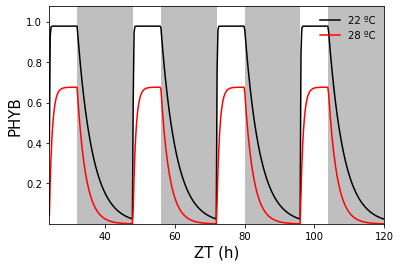

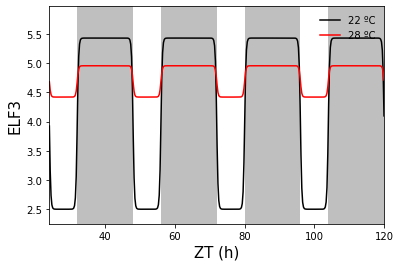

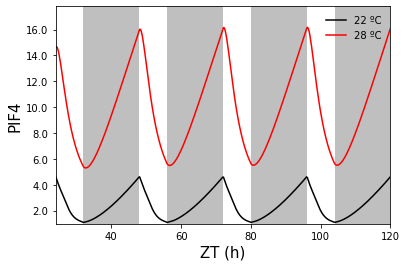

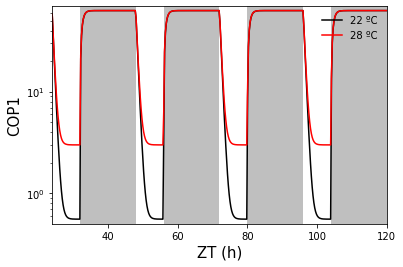

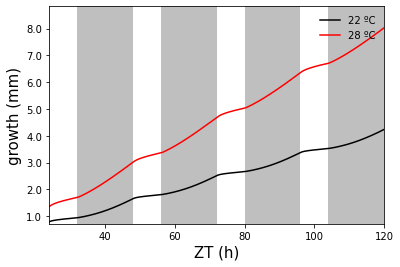

In [47]:
def modsavefigs(time, b22, b28, Daylength, Title):
    xmin=24
    xmax=120
    mask=(time>=xmin) & (time<=xmax)
    Time=time[mask]
    B22=b22[mask]
    B28=b28[mask]
    fig=plt.figure()
    ax=plt.gca()
    ax.plot(Time,B22,'k', label='22 ºC')
    ax.plot(Time,B28,'r', label='28 ºC')
    for days in range(0,5):
        time_day=np.linspace(days*24+Daylength,(days*24)+24, 100)
        ax.fill_between(time_day, 0, 10000, facecolor='grey', alpha=0.5)
    ax.set_ylim([0.9*min(min(B22),min(B28)), 1.10*max(max(B22),max(B28))])
    ax.set_xlabel('ZT (h)', size=15)
    ax.set_ylabel(Title, size=15)
    ax.set_xticklabels(ax.get_xticks(), size=10)
    ax.set_yticklabels(ax.get_yticks(), size=10)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.legend(loc='upper right',frameon=False)
    ax.set_xlim([xmin, xmax])
    if Title=='COP1':
        ax.set_yscale('log')
    #fig.savefig('figures/fig2_'+Title+'_'+suffix+'.pdf', bbox_inches='tight')
modsavefigs(time, B22, B28, 8, 'PHYB')
modsavefigs(time, E22, E28, 8, 'ELF3')
modsavefigs(time, P22, P28, 8, 'PIF4')
modsavefigs(time, C22, C28, 8, 'COP1')
modsavefigs(time, G22, G28, 8, 'growth (mm)')

# SUPPFIG 1 and 2
### PROTEIN DYNAMICS IN LONG DAY

In [48]:
time=np.linspace(0,120,500)
B22=tot_python['Col']['22_16'][:,0]
B28=tot_python['Col']['28_16'][:,0]
E22=tot_python['Col']['22_16'][:,1]
E28=tot_python['Col']['28_16'][:,1]
P22=tot_python['Col']['22_16'][:,2]
P28=tot_python['Col']['28_16'][:,2]
C22=tot_python['Col']['22_16'][:,3]
C28=tot_python['Col']['28_16'][:,3]
G22=tot_python['Col']['22_16'][:,4]
G28=tot_python['Col']['28_16'][:,4]

### WRITE RESULTS

In [49]:
DF=pd.DataFrame({'Time':time, 'phyb22':B22, 'phyb28':B28,
                 'ELF322':E22, 'ELF328':E28, 'PIF422':P22,
                 'PIF428':P28, 'COP122':C22, 'COP128':C28})
DF.to_csv('results/long_day_proteins.csv', float_format='%.3f', index=False)
DF.to_excel('results/long_day_proteins.xls', float_format='%.3f', index=False)

### PLOT

/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1

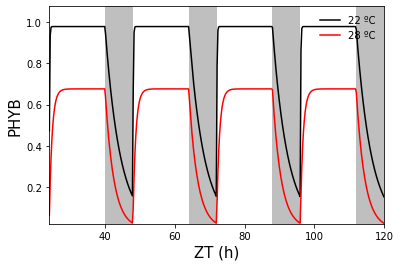

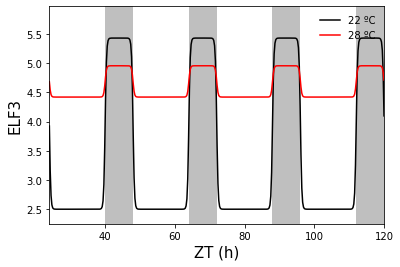

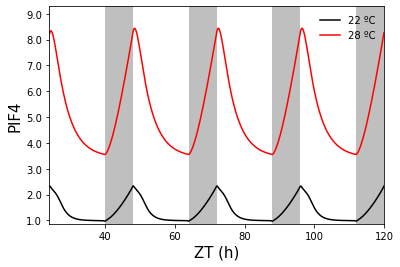

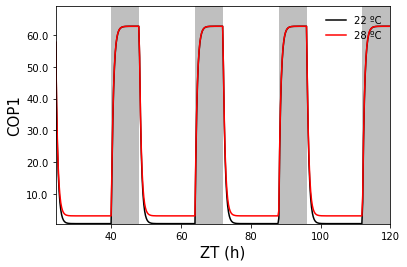

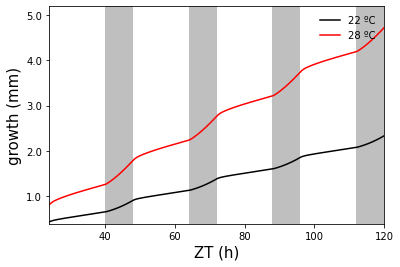

In [50]:
def modsavefigs(time, b22, b28, Daylength, Title):
    xmin=24
    xmax=120
    mask=(time>=xmin) & (time<=xmax)
    Time=time[mask]
    B22=b22[mask]
    B28=b28[mask]
    fig=plt.figure()
    ax=plt.gca()
    ax.plot(Time,B22,'k', label='22 ºC')
    ax.plot(Time,B28,'r', label='28 ºC')
    for days in range(0,5):
        time_day=np.linspace(days*24+Daylength,(days*24)+24, 100)
        ax.fill_between(time_day, 0, 10000, facecolor='grey', alpha=0.5)
    ax.set_ylim([0.9*min(min(B22),min(B28)), 1.10*max(max(B22),max(B28))])
    ax.set_xlabel('ZT (h)', size=15)
    ax.set_ylabel(Title, size=15)
    ax.set_xticklabels(ax.get_xticks(), size=10)
    ax.set_yticklabels(ax.get_yticks(), size=10)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.legend(loc='upper right',frameon=False)
    ax.set_xlim([xmin, xmax])
    #fig.savefig('figures/SUPPfig2_'+Title+'_'+suffix+'.pdf', bbox_inches='tight')
modsavefigs(time, B22, B28, 16, 'PHYB')
modsavefigs(time, E22, E28, 16, 'ELF3')
modsavefigs(time, P22, P28, 16, 'PIF4')
modsavefigs(time, C22, C28, 16, 'COP1')
modsavefigs(time, G22, G28, 16, 'growth (mm)')

# FIGURE 5

/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator


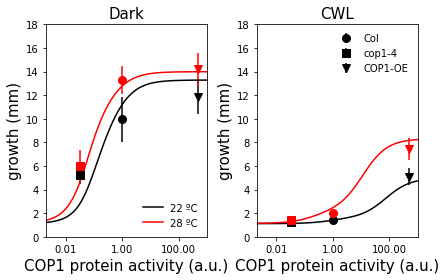

In [51]:
#DF=pd.read_csv('results/effect_of_cop1_'+suffix+'.csv')
DF=pd.read_csv('results/heatmap_COP1ox WT_minerr_19.csv')
fig=plt.figure()
#DARK
ax=fig.add_subplot(1,2,1)
DFd=DF[DF['D']==0]
TC=['k', 'r']
COP1m=['Col','cop1-4','COP1-OE']
COP1ex=[1.0, params[29], params[28]]
SL=['o','s','v']
for t1,t in enumerate([22,28]):
    DFc=DFd[DFd['T']==t]
    ax.plot(DFc['Prot'], DFc['Growth'], color=TC[t1], label=str(t)+' ºC')
    ax.set_xscale('log')
    ax.set_xlim([0.002,999])
    ax.set_ylim([0,18])
    ax.set_xlabel('COP1 protein activity (a.u.)', size=15)
    ax.set_ylabel('growth (mm)', size=15)
    ax.set_xticks([0.01,1,100])
    ax.set_xticklabels(ax.get_xticks(), size=10)
    ax.set_yticklabels(ax.get_yticks(), size=10)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.set_title('Dark', fontsize=15)
    ax.legend(loc='lower right', frameon=False)
    #PLOT MUTANTS
    for c1,c in enumerate(COP1m):
        sT=str(t)
        y=avgdata[COP1m[c1]][sT+'_0']
        yerr=stddata[COP1m[c1]][sT+'_0']
        ax.errorbar(COP1ex[c1],y,yerr=yerr,fmt=SL[c1],color=TC[t1], markersize=8,ecolor=TC[t1],markeredgecolor=TC[t1])
#LIGHT
ax=fig.add_subplot(1,2,2)
DFd=DF[DF['D']==24]
TC=['k', 'r']
for t1,t in enumerate([22,28]):
    DFc=DFd[DFd['T']==t]
    ax.plot(DFc['Prot'], DFc['Growth'], color=TC[t1], label='_nolegend_')
    ax.set_xscale('log')
    ax.set_xlim([0.002,999])
    ax.set_ylim([0,18])
    ax.set_xlabel('COP1 protein activity (a.u.)', size=15)
    ax.set_ylabel('growth (mm)', size=15)
    ax.set_xticks([0.01,1,100])
    ax.set_xticklabels(ax.get_xticks(), size=10)
    ax.set_yticklabels(ax.get_yticks(), size=10)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.set_title('CWL', fontsize=15)
    #PLOT MUTANTS
    for c1,c in enumerate(COP1m):
        sT=str(t)
        y=avgdata[COP1m[c1]][sT+'_24']
        yerr=stddata[COP1m[c1]][sT+'_24']
        if t==22:
            ax.errorbar(COP1ex[c1],y,yerr=yerr,fmt=SL[c1],color=TC[t1],markersize=8,ecolor=TC[t1],markeredgecolor=TC[t1],label=c)
        else:
            ax.errorbar(COP1ex[c1],y,yerr=yerr,fmt=SL[c1],color=TC[t1],markersize=8,ecolor=TC[t1],markeredgecolor=TC[t1])
    ax.legend(frameon=False)
fig.tight_layout()
fig.savefig('figures/fig5B_paper.pdf', bbox_inches='tight')

# FIGURE 6

## PLOT HEATMAPS

COP1ox WT


/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator


ELF3ox WT


/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator


PHYBox WT


/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator


COP1ox phyb


/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator


ELF3ox cop1-4


/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator


PHYBox cop1-4


/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator


COP1ox elf3-8


/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator


ELF3ox phyb


/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator


PHYBox elf3-8


/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator


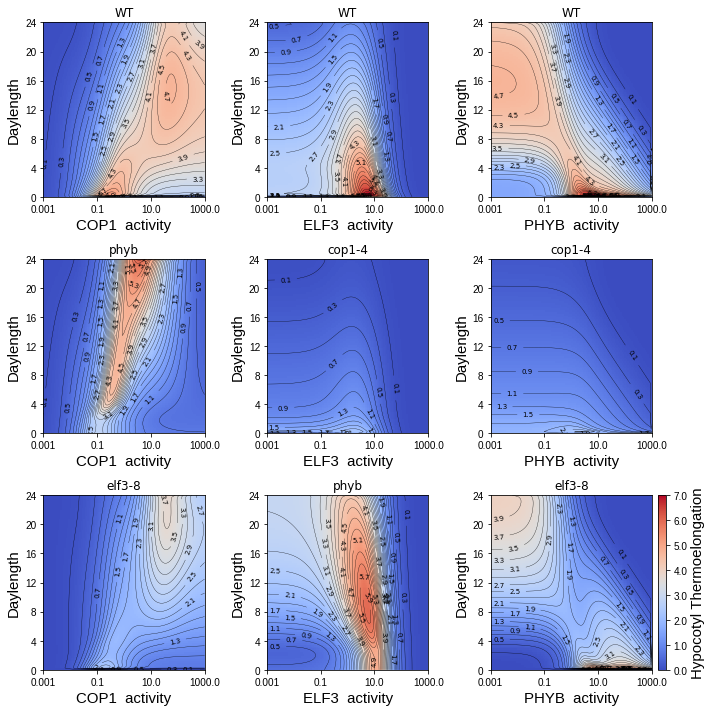

In [52]:
#GET KEY FROM DATAFRAME
def get_key(df, key):
    kL=df[key].tolist()
    kM={}
    for k in kL:
        kM[k]=1
    kL=[]
    for k in kM:
        kL.append(k)
    return sorted(kL)

def plot_heatmap(X1,Y1,R,mut,ylabel,vmax,X,Y,ax,count):
    text=mut.split()
    prot=text[0][:-2]
    fondo=text[1]
    if len(text)>2:
        fondo=fondo+' '+text[2]
    cmap='coolwarm'
    if 'growth' in ylabel:
        cmap='summer_r'#'YlGn'
    I=ax.pcolormesh(X,Y,R, vmax=vmax, vmin=0, rasterized=True, cmap=cmap)#'RdBu_r')
    ax.set_xscale('log')
    cr=0.2
    C=np.arange(0.1,vmax,cr)
    if 'growth' in ylabel: 
        cr=1
        C=np.arange(0,vmax+1,cr)
   
    CS=ax.contour(X,Y,R,C, linewidths=0.3, colors='k')#cmap='binary')
    CL=ax.clabel(CS, C, inline=True, fmt='%.1f', fontsize=7, use_clabeltext=True)
    if count==9:
        cax = ax.inset_axes([1.04, 0, 0.05, 1.0], transform=ax.transAxes)
        cbar=fig.colorbar(I, ax=ax, cax=cax)
        cbar.ax.set_yticklabels(cbar.ax.get_yticks(), fontname='Helvetica')
        cbar.ax.set_ylabel(ylabel, fontname='Helvetica', fontsize=15)
        cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.set_ylabel('Daylength', fontname='Helvetica', fontsize=15)
    ax.set_xlabel(prot+'  activity', fontname='Helvetica', fontsize=15)
    ax.set_yticks(range(0,25,4))
    ax.set_yticklabels(ax.get_yticks(), fontname='Helvetica')
    ax.set_xticklabels(ax.get_xticks(), fontname='Helvetica')
    ax.set_title(fondo)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    plt.minorticks_off()
    ax.set_ylim([0,24])
    return ax

M=['COP1ox WT', 'ELF3ox WT', 'PHYBox WT',
   'COP1ox phyb', 'ELF3ox cop1-4', 'PHYBox cop1-4',
   'COP1ox elf3-8', 'ELF3ox phyb', 'PHYBox elf3-8']
suffix='minerr_19'
fig=plt.figure(figsize=(10,10))
for count,mut in enumerate(M):
    print(mut)
    DF=pd.read_csv('results/heatmap_'+mut+'_'+suffix+'.csv')
    X=get_key(DF,'Prot')    
    Y=get_key(DF,'D')
    X=np.array(X)
    R=np.zeros((len(Y),len(X)))
    R1=np.zeros((len(Y),len(X)))
    R2=np.zeros((len(Y),len(X)))
    for i,x in enumerate(X):
        for j,y in enumerate(Y):
            A=DF[(DF['Prot']==x) & (DF['D']==y)]
            A22=A[A['T']==22]
            A28=A[A['T']==28]
            R[j,i]=A28['Growth'].mean()-A22['Growth'].mean()
            R1[j,i]=A28['Growth'].mean()
            R2[j,i]=A22['Growth'].mean()
    yshift=0.5
    yadd=24+yshift
    Y1=np.array(Y)-yshift
    Y1=list(Y)+[yadd]
    xshift=0.1
    xadd=10**(3+xshift)
    X1=np.log10(X)-xshift
    X1=list(10**X1)+[xadd]
    
    vmax=max(R1.max(),R2.max())
    vmax=14
    Vmax=7.0
    ax=fig.add_subplot(3,3,count+1)
    ax=plot_heatmap(X1,Y1,R,mut,'Hypocotyl Thermoelongation',Vmax,X,Y,ax,count+1)
fig.tight_layout()
fig.savefig('figures/heatmaps_paper.pdf', bbox_inches='tight')

# SUPPFIG 5
## PLOT DATA USED FOR FITTING THE MODEL
### GROWTH DATA

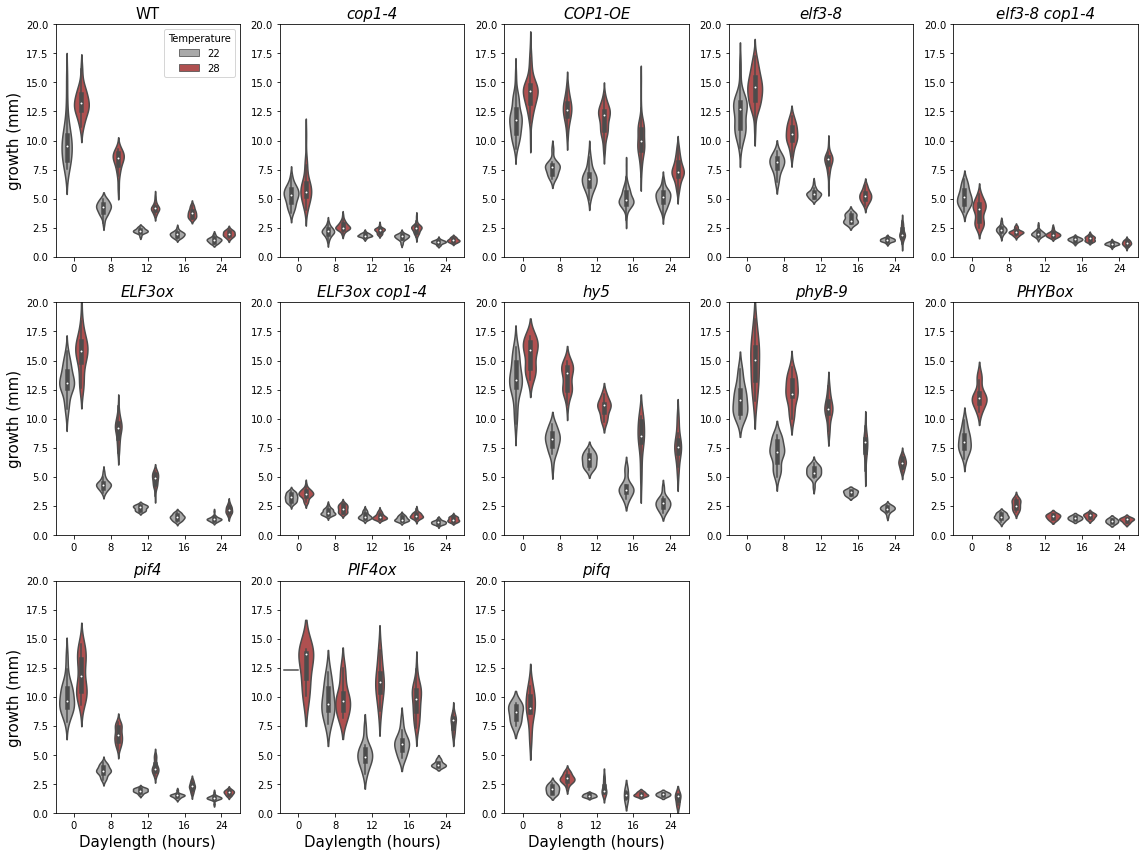

In [53]:
DF=pd.read_csv('data/daylength_def.csv')
mutants=sorted(get_key(DF,'Genotype'),key=str.casefold)
mutants.remove('lux')
mutants.remove('elf4')
mutants.remove('det1-1')

fig=plt.figure(figsize=(16,12))
maxcols=5
maxrows=int(np.ceil(len(mutants)/maxcols))
for i,mut in enumerate(mutants):
    ax=fig.add_subplot(maxrows,maxcols,i+1)
    M=DF[DF.Genotype==mut]
    TC=['k','r']
    TP=['binary', 'Reds']
    D=M.Daylength
    G=M.Growth
    ax1=sns.violinplot(x='Daylength', y='Growth', hue='Temperature', 
                       data=M, palette=sns.color_palette(['darkgrey','r'], desat=0.5))
    if i>0:
        ax1.get_legend().remove()#ax1.legend()
    if mut=='Col':
        ax.set_title('WT', size=15)
    else:
        ax.set_title(mut, style='italic', size=15)
    ax.set_ylim([0,20])
    if i>=10:
        ax.set_xlabel('Daylength (hours)', size=15)
    else:
        ax.set_xlabel('')
    if i%5==0:
        ax.set_ylabel('growth (mm)', size=15)
    else:
        ax.set_ylabel('')
fig.tight_layout()

### ALTERNATIVE PLOT

/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3

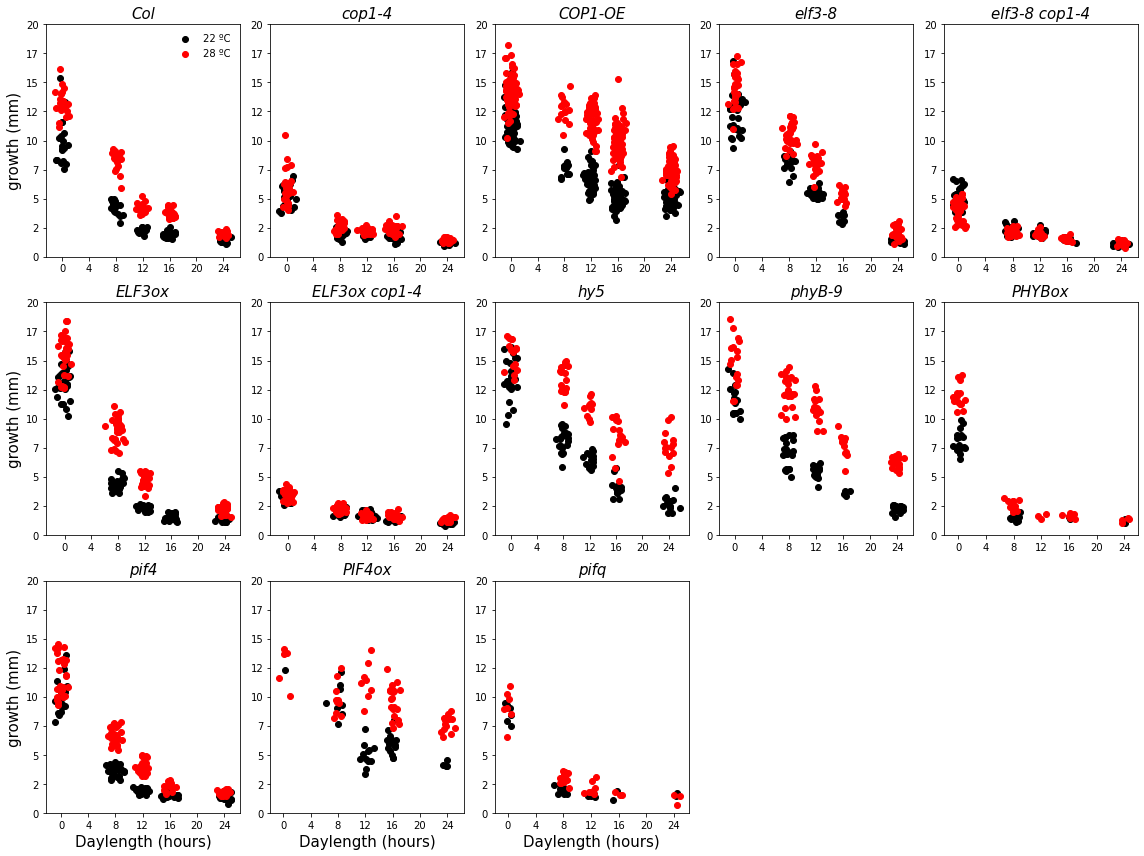

In [54]:
DF=pd.read_csv('data/daylength_def.csv')
mutants=sorted(get_key(DF,'Genotype'),key=str.casefold)
mutants.remove('lux')
mutants.remove('elf4')
mutants.remove('det1-1')
fig=plt.figure(figsize=(16,12))
maxcols=5
maxrows=int(np.ceil(len(mutants)/maxcols))
for i,mut in enumerate(mutants):
    ax=fig.add_subplot(maxrows,maxcols,i+1)
    M=DF[DF.Genotype==mut]
    TC=['k','r']
    for t1,T in enumerate([22,28]):
        MT=M[M.Temperature==T]
        D=MT.Daylength+np.random.normal(0,0.5, len(MT))
        G=MT.Growth
        ax.scatter(D,G,color=TC[t1],label=str(T)+' ºC')
    from collections import OrderedDict
    handles, labels = ax.get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    if i==0:
        ax.legend(by_label.values(), by_label.keys(),loc='upper right', frameon=False)
    ax.set_title(mut, style='italic', size=15)
    ax.set_ylim([0,20])
    if i>=10:
        ax.set_xlabel('Daylength (hours)', size=15)
    else:
        ax.set_xlabel('')
    if i%5==0:
        ax.set_ylabel('growth (mm)', size=15)
    else:
        ax.set_ylabel('')
    ax.set_xticks([0,4,8,12,16,20,24])
    ax.set_xticklabels(ax.get_xticks(), size=10)
    ax.set_yticklabels(ax.get_yticks(), size=10)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
fig.tight_layout()

### EXPRESSION DATA

/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator


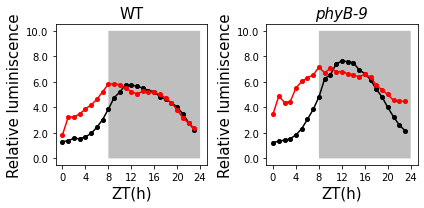

In [55]:
EX=pd.read_csv('data/expression_def.csv', sep='\t')
T=np.arange(0,24,1)
T2=np.arange(0,24,0.001)
fig=plt.figure(figsize=(6,3))
#COL DATA
ax=fig.add_subplot(1,2,1)
ax.plot(T,EX['Col 22'], 'o-k', label='22 ºC', markersize=4)
ax.plot(T,EX['Col 28'], 'o-r', label='28 ºC', markersize=4)
D=np.heaviside(T2-8,0)
ax.fill_between(T2,0*D,10*D,facecolor='grey', alpha=0.5)
ax.set_title('WT', size=15)
ax.set_xticks([0,4,8,12,16,20,24])
ax.set_xticklabels(ax.get_xticks(), size=10)
ax.set_yticklabels(ax.get_yticks(), size=10)
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_xlabel('ZT(h)', size=15)
ax.set_ylabel('Relative luminiscence', size=15)
#phyB DATA
ax=fig.add_subplot(1,2,2)
ax.plot(T,EX['phyB 22'], 'o-k', label='22 ºC', markersize=4)
ax.plot(T,EX['phyB 28'], 'o-r', label='28 ºC', markersize=4)
D=np.heaviside(T2-8,0)
ax.fill_between(T2,0*D,10*D,facecolor='grey', alpha=0.5)
ax.set_title('phyB-9', style='italic', size=15)
ax.set_xticks([0,4,8,12,16,20,24])
ax.set_xticklabels(ax.get_xticks(), size=10)
ax.set_yticklabels(ax.get_yticks(), size=10,)
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_xlabel('ZT(h)', size=15)
ax.set_ylabel('Relative luminiscence',  size=15)
fig.tight_layout()